In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = list(set(sg_data_14["STATE"]))
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_split_randomly_for_years(dfs)

310
247
195
228
MI 14 Ratio is 1.096
IL 14 Ratio is 0.998
PA 14 Ratio is 1.018
GA 14 Ratio is 1.161
OK 14 Ratio is 1.147
DE 14 Ratio is 1.063
WA 14 Ratio is 1.105
CT 14 Ratio is 0.913
OH 14 Ratio is 1.165
VA 14 Ratio is 1.152
NE 14 Ratio is 1.166
MT 14 Ratio is 1.092
IN 14 Ratio is 1.162
CA 14 Ratio is 1.064
HI 14 Ratio is 1.083
ND 14 Ratio is 1.108
MD 14 Ratio is 1.142
SC 14 Ratio is 1.028
RI 14 Ratio is 0.930
AK 14 Ratio is 0.703
KY 14 Ratio is 1.280
WI 14 Ratio is 1.039
LA 14 Ratio is 1.092
MN 14 Ratio is 1.089
MS 14 Ratio is 1.254
WV 14 Ratio is 0.952
FL 14 Ratio is 1.106
MI 15 Ratio is 1.010
IL 15 Ratio is 0.959
PA 15 Ratio is 0.988
NH 15 Ratio is 0.960
NM 15 Ratio is 1.021
NV 15 Ratio is 1.200
OK 15 Ratio is 1.053
UT 15 Ratio is 1.392
CT 15 Ratio is 0.901
OH 15 Ratio is 1.098
VA 15 Ratio is 1.170
OR 15 Ratio is 1.049
CO 15 Ratio is 1.093
IN 15 Ratio is 1.085
HI 15 Ratio is 1.001
AL 15 Ratio is 1.011
RI 15 Ratio is 0.993
AK 15 Ratio is 0.654
LA 15 Ratio is 0.996
MN 15 Ratio is 1.0

In [11]:
mm_total = 0
for adf in dfs_new:
    mm_total = mm_total + sum(adf["MM"])
print(mm_total)

320364319.7871


In [12]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")

In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

In [18]:
state_label = "All States"

beta = 40000.000


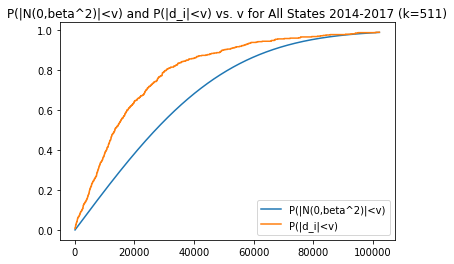

In [19]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [20]:
beta1, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2)

k = 511
test_stat at this k = 0.06008

At the point of maximum difference with beta = 40000:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.3400
Difference = 0.2627




At the point of maximum difference with beta = 30000:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.4425
Difference = 0.1602




At the point of maximum difference with beta = 30000:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.4425
Difference = 0.1602




At the point of maximum difference with beta = 29900:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.4438
Difference = 0.1589




At the point of maximum difference with beta = 29800:
P(|d_i|<v) = 0.5108
P(|N(0,max_beta^2)|<v) = 0.3530
Difference = 0.1578




At the point of maximum difference with beta = 29700:
P(|d_i|<v) = 0.5108
P(|N(0,max_beta^2)|<v) = 0.3541
Difference = 0.1567




At the point of maximum difference with beta = 29600:
P(|d_i|<v) = 0.5108
P(|N(0,max_beta^2)|<v) = 0.3552
Difference = 0.1555




At the point of maximum difference with beta = 2950


At the point of maximum difference with beta = 23900:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.3991
Difference = 0.0803




At the point of maximum difference with beta = 23800:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4006
Difference = 0.0788




At the point of maximum difference with beta = 23700:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4022
Difference = 0.0773




At the point of maximum difference with beta = 23600:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4037
Difference = 0.0757




At the point of maximum difference with beta = 23500:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4053
Difference = 0.0742




At the point of maximum difference with beta = 23400:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4069
Difference = 0.0726




At the point of maximum difference with beta = 23300:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta^2)|<v) = 0.4085
Difference = 0.0710




At the point of maximum difference with beta = 23200:
P(|d_i|<v) = 0.4795
P(|N(0,max_beta

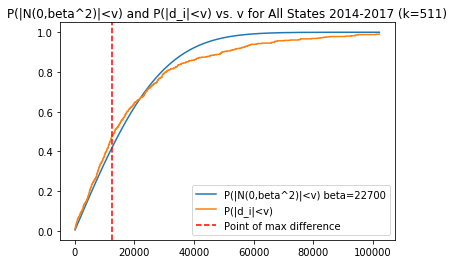

In [21]:
beta1 = beta1+100

theoretical = [special.erf(vi/(beta1*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta1))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [22]:
run_binom_stat_test2(beta1, df2.values)

Beta (=std): 22700
Number of T/sqrt(n) above 2 stds: 61
Proportion of T/sqrt(n) above 2 stds: 0.119
P value = 0.000000


In [23]:
#df3 = create_df3(states, dfs_new)

In [24]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1 - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1 + 10000)

Sum sqrt(a) = 52556.788
Sum sqrt(a) = 52556.788
Sum sqrt(a) = 52556.788


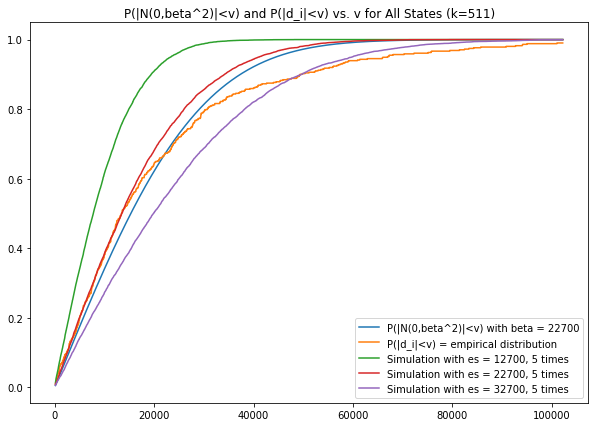

In [25]:
theoretical = [special.erf(vi/(beta1*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta1))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta1 - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta1))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta1 + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (state_label, len(df2)))
plt.legend()

In [26]:
beta1, _ = run_test_against_simulation_adjust_for_imbalances(states, dfs_new, beta1, ratios2)

k = 511
test_stat at this k = 0.06008
Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 22700:
P(|d_i|<v) = 0.0646
P(|N(0,max_beta^2)|<v) = 0.0420
Difference = 0.0226 NOT > test_stat
Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 32700:
P(|d_i|<v) = 0.6008
P(|N(0,max_beta^2)|<v) = 0.4471
Difference = 0.1537



Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 32600:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.4517
Difference = 0.1511



Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 32500:
P(|d_i|<v) = 0.5108
P(|N(0,max_beta^2)|<v) = 0.3610
Difference = 0.1498



Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 32400:
P(|d_i|<v) = 0.5088
P(|N(0,max_beta^2)|<v) = 0.3653
Difference = 0.1435



Sum sqrt(a) = 52556.788

At the point of maximum difference with beta = 32300:
P(|d_i|<v) = 0.6027
P(|N(0,max_beta^2)|<v) = 0.4557
Difference = 0.1470



Sum sqrt(a) = 52556.788



KeyboardInterrupt: 

In [ ]:
run_binom_stat_test2(beta1, df2.values)